# Zadanie numeryczne 10
*Michał Kolasa, Metody numeryczne gr.5*

## Zadany problem:
Zadanie polegało na znalezieniu rozwiązań równania charakterystycznego macierzy $\displaystyle A$ danego wzorem $\displaystyle det(A-\lambda\mathbb 1)$, gdzie $\displaystyle A$ to macierz:

\begin{equation}
A=
\begin{bmatrix}
4 & -1 & 0\\
-1 & 4 & -1\\
0 & -1 & 4
\end{bmatrix}
\end{equation}

\begin{equation}
det
\begin{vmatrix}
4-\lambda & -1 & 0\\
-1 & 4-\lambda & -1\\
0 & -1 & 4-\lambda
\end{vmatrix}
= -\lambda^{3}+12\lambda^{2}-46\lambda+56
\end{equation}

Z tego otrzymujemy funkcję:
$\newline\displaystyle f(\lambda)=-\lambda^{3}+12\lambda^{2}-46\lambda+56$ Dalej będę poszukiwał jej miejsc zerowych za pomocą trzech wybranych metod t.j.:
* bisekcji,
* regula falsi,
* metody siecznych.

W celu dobrania odpowiednich przedziałów poszukiwania, tworzę wykres funkcji $\displaystyle f(\lambda)$. Wiemy, że wielomian trzeciego stopnia może mieć maksymalnie trzy miejsca zerowe, dlatego potrzebujemy maksymalnie trzech przedziałów poszukiwania, w których nasza funkcja zmienia znak. Interesujący nas fragment wykresu zamieszczam poniżej.

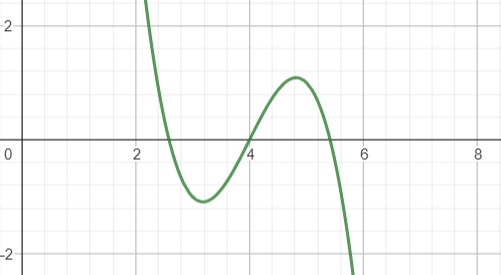

Możemy przy jego pomocy zobaczyć przybliżoną lokalizację miejsc zerowych i wprowadzić następujące przedziały ich poszukiwania, na których co ważne nasza funkcja jest **ciągła**:
* $\displaystyle [0, 3]$
* $\displaystyle [3.1, 5]$
* $\displaystyle [5.1, 7]$

Do iplementacji poszczególnych metod, stosuję język **Python**.

In [5]:
import math

def funkcja(x):
    return -x*x*x + 12*x*x - 46*x + 56


epsilon = 1e-8

# Przedział 1
a = 0
b = 3
# Przedział 2
c = 3.1
d = 4.5
# Przedział 3
e = 4.6
f = 6

## Metoda bisekcji:
W tej metodzie za pierwsze przybliżenie miejsca zerowego, bierzemy krańce przedziału $\displaystyle x_1$ oraz $\displaystyle x_2$, dalej $\displaystyle x_3 = \frac{x_1+x_2}{2}$. Następnie ustalamy, w którym z przedziałów $\displaystyle [x_1,x_3]$, $\displaystyle [x_3,x_2]$ funkcja zmienia znak, powtarzając całą procedurę dla tego przedziału. Za warunek końcowy przyjmujemy $\displaystyle |x_{n+1}-x_{n}| <= \epsilon$, innymi słowy zakończymy kiedy odległość pomiędzy dwoma przybliżeniami miejsca zerowego będzie mniejsza, bądź równa zadanej dokładności.

In [6]:
def bisekcja(x_1,x_2):
    przyblizenie = x_1
    iteracje = 0
    
    while (math.fabs(x_2 - x_1)) >= epsilon:
        
        przyblizenie = (x_1 + x_2) / 2
        
        if (funkcja(przyblizenie) * funkcja(x_1) < 0):
            x_2 = przyblizenie
        else:
            x_1 = przyblizenie
            
        iteracje += 1
        
    print("Miejsce zerowe: ", przyblizenie)
    print("Liczba iteracji: ", iteracje)
    
    
bisekcja(a,b) #[0,3]
bisekcja(c,d) #[3.1, 4.5]
bisekcja(e,f) #[4.6, 6]

Miejsce zerowe:  2.585786433890462
Liczba iteracji:  29
Miejsce zerowe:  4.00000000372529
Liczba iteracji:  28
Miejsce zerowe:  5.414213567227124
Liczba iteracji:  28


## Metoda *regula falsi*:

Tutaj jako przybliżenie miejsca zerowego bierzemy punkt przecięcia siecznej przechodzącej przez punkty $\displaystyle (x_1,f(x_1))$, $\displaystyle (x_2,f(x_2))$ z osią $\displaystyle OX$ dany wzorem:
$\newline\displaystyle x_3 = \frac{f(x_1)x_2 - f(x_2)x_1}{f(x_1)-f(x_2)}$ Dalej postępujemy analogicznie jak w metodzie bisekcji, wybierając ten z przedziałów $\displaystyle [x_1,x_3]$, $\displaystyle [x_3,x_2]$, w którym funkcja zmienia znak i powtarzamy całość do momentu uzyskania zadanej dokładności (korzystając z tej samej różnicy co przy metodzie bisekcji).

In [7]:
def regula_falsi(x_1,x_2):
    przyblizenie = x_1
    iteracje = 0
    
    while (math.fabs(x_2 - x_1) >= epsilon):
        
        przyblizenie = (funkcja(x_1)*x_2 - funkcja(x_2)*x_1) / (funkcja(x_1) - funkcja(x_2))
        
        if (funkcja(przyblizenie) * funkcja(x_1) < 0):
            x_2 = przyblizenie
        else:
            x_1 = przyblizenie
            
        iteracje += 1
        
    print("Miejsce zerowe: ", przyblizenie)
    print("Liczba iteracji: ", iteracje)
    
    
regula_falsi(a,b) #[0,3]
regula_falsi(c,d) #[3.1, 4.5]
regula_falsi(e,f) #[4.6, 6]

Miejsce zerowe:  2.585786437626908
Liczba iteracji:  162
Miejsce zerowe:  3.9999999999999796
Liczba iteracji:  7
Miejsce zerowe:  5.414213562373098
Liczba iteracji:  38


## Metoda siecznych:

Przy tej metodzie nie jest wymagane aby nasza funkcja zmieniała znak w zadanym przedziale poszukiwania miejsca zerowego, wymagane jest jedynie aby dla przedziału $\displaystyle [x_1,x_2]$; $\displaystyle f(x_1) \neq f(x_2)$. Dalej przez punkty $\displaystyle x_1$, $\displaystyle x_2$ prowadzimy sieczną i bierzemy jej miejsce zerowe dane tym samym wzorem, z którego korzystałem w metodzie *regula falsi*. Tutaj jednak w kolejnych krokach bierzemy zawsze dwa ostatnie punkty, **bez względu na to czy funkcja zmienia znak**, w przeciwieństwie do metody *regula falsi*. Czynność powtarzmy do momentu uzyskania zadanej dokładności.

In [8]:
def metoda_siecznych(x_1, x_2):
    przyblizenie = x_1
    iteracje = 0

    while (math.fabs(x_2 - x_1) >= epsilon):

        przyblizenie = (funkcja(x_1) * x_2 - funkcja(x_2) * x_1) / (funkcja(x_1) - funkcja(x_2))

        x_1 = x_2
        x_2 = przyblizenie

        iteracje += 1

    print("Miejsce zerowe: ", przyblizenie)
    print("Liczba iteracji: ", iteracje)

metoda_siecznych(a, b)  # [0,3]
metoda_siecznych(c, d)  # [3.1, 5]
metoda_siecznych(e, f)  # [5.1, 7]

Miejsce zerowe:  2.5857864376269712
Liczba iteracji:  9
Miejsce zerowe:  3.999999999999994
Liczba iteracji:  5
Miejsce zerowe:  5.414213562373052
Liczba iteracji:  10


## Podsumowanie - najszybsza metoda:
Zdecydowanie najszybsza okazała się **metoda siecznych**, w **metodzie regula falsi** bardzo wiele zależy od przedziału poszukiwania bowiem w przedziale 2 i 3 była ona szybsza od metody **bisekcji**, z kolei dla przedziału 1 potrzebowała aż 162 iteracji. Należy również pamiętać o ograniczeniach poszczególnych metod, bowiem **metoda bisekji** nie działa dla miejsc zerowych o parzystej krotności, z kolei **metoda siecznych** w niektórych przypadkach może nie być zbieżna.